___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [2]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [5]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

In [6]:
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [7]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
y_train.shape

(60000,)

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True) # We observe it is a balanced dataset

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [14]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [15]:
# Checking the shape of one image
x_train[0].shape

(28, 28)

In [16]:
x_train[0] # Checking the image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [17]:
y_train[0] # Checking the label of the chosen image

9

In [18]:
classes[y_train[0]] # Inspect the corresponding class

'Ankle boot'

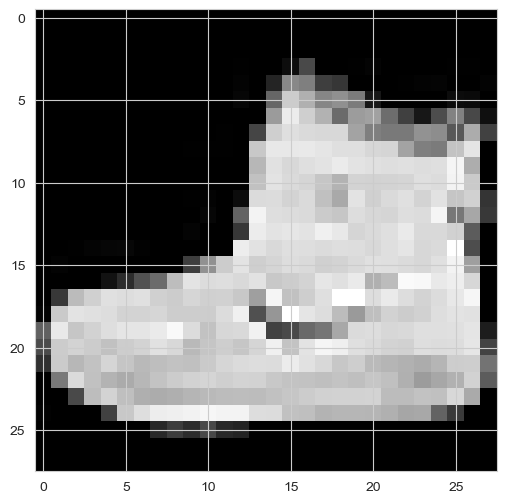

In [19]:
plt.imshow(x_train[0], cmap="gray") # View the image using the matplotlib
plt.show()

<Axes: >

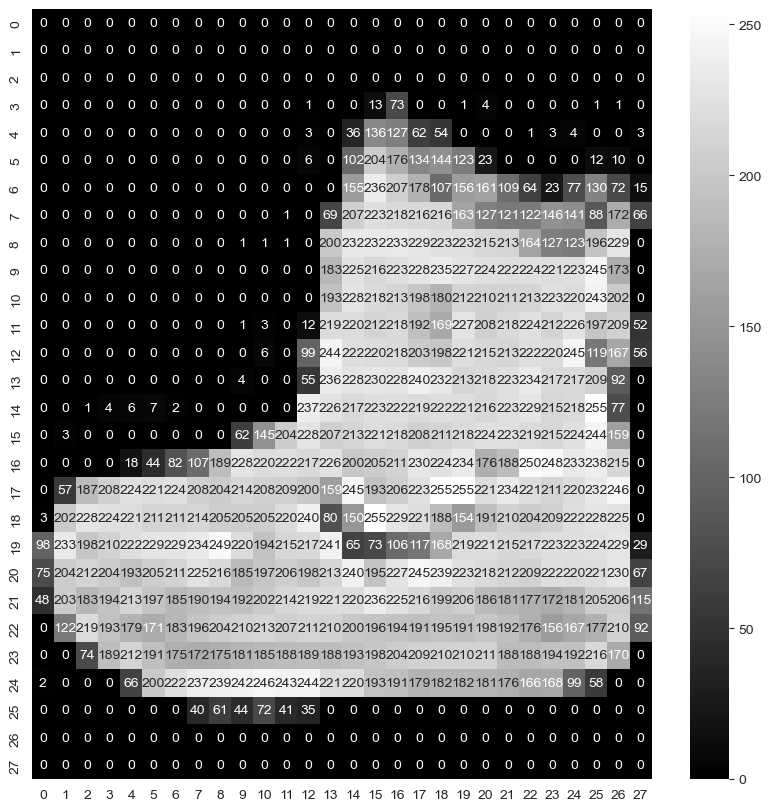

In [20]:
plt.figure(figsize=(10, 10)) # To View the pixels values
sns.heatmap(x_train[0], annot=True, cmap="gray", fmt=".3g")

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [21]:
x_train[0].min() # Checking the minimum pixel value

0

In [22]:
x_train[0].max() # Checking the maximum pixel value

255

In [23]:
# Normalize image pixels

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [24]:
x_train[0].min() # Checking the minimum pixel value after normalization

0.0

In [25]:
x_train[0].max() # Checking the maximum pixel value after normalization

1.0

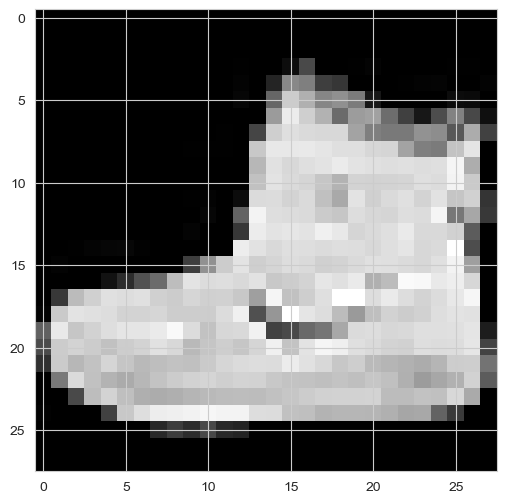

In [26]:
plt.imshow(x_train[0], cmap="gray") # Checking the image after normalization, We observe no changes
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [27]:
x_train.shape, x_test.shape # Checking the dimensions

((60000, 28, 28), (10000, 28, 28))

In [28]:
X_train = np.expand_dims(x_train, 3) # Reshaping the arrays by expanding the dimensions
X_test = np.expand_dims(x_test, 3)

In [29]:
X_train.shape, X_test.shape # Checking the dimensions after reshaping

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
y_test.shape

(10000,)

In [33]:
y_train.shape

(60000,)

In [34]:
Y_train = to_categorical(y_train, 10) # Convert the arrays values to be one-hot encoded
Y_test = to_categorical(y_test, 10)

In [35]:
Y_test.shape

(10000, 10)

In [36]:
Y_train.shape

(60000, 10)

In [37]:
y_train[3]

3

In [38]:
Y_train[3] # After converting the arrays values will give 1 at the corresponding index

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Splitting the training data to training and validation data

In [39]:
from numpy.random import seed
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, 
                                                      test_size=0.1, stratify=Y_train, random_state=SEED, shuffle=True)

In [40]:
X_test.shape # Checking the shape of each spilt

(10000, 28, 28, 1)

In [41]:
X_train.shape

(54000, 28, 28, 1)

In [42]:
X_valid.shape

(6000, 28, 28, 1)

In [43]:
Y_train.shape

(54000, 10)

In [44]:
Y_valid.shape

(6000, 10)

In [45]:
Y_test.shape

(10000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [47]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
) 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1))) 

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=4, restore_best_weights=True
)

In [51]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_valid, Y_valid),
    callbacks=[early_stop],
)

Epoch 1/30
1688/1688 [==============================] - 82s 48ms/step - loss: 0.3908 - accuracy: 0.8623 - val_loss: 0.3344 - val_accuracy: 0.8787
Epoch 2/30
1688/1688 [==============================] - 89s 53ms/step - loss: 0.2552 - accuracy: 0.9063 - val_loss: 0.2898 - val_accuracy: 0.9012
Epoch 3/30
1688/1688 [==============================] - 91s 54ms/step - loss: 0.2103 - accuracy: 0.9233 - val_loss: 0.2706 - val_accuracy: 0.9073
Epoch 4/30
1688/1688 [==============================] - 91s 54ms/step - loss: 0.1784 - accuracy: 0.9354 - val_loss: 0.2745 - val_accuracy: 0.9060
Epoch 5/30
1688/1688 [==============================] - 85s 50ms/step - loss: 0.1526 - accuracy: 0.9441 - val_loss: 0.2773 - val_accuracy: 0.9120
Epoch 6/30
1688/1688 [==============================] - 89s 53ms/step - loss: 0.1319 - accuracy: 0.9525 - val_loss: 0.3150 - val_accuracy: 0.9017
Epoch 7/30
1688/1688 [==============================] - 127s 75ms/step - loss: 0.1136 - accuracy: 0.9589 - val_loss: 0.3170 

**TASK 7: Plot values of metrics you used in your model.**

In [52]:
model.metrics_names

['loss', 'accuracy']

In [53]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.391,0.862,0.334,0.879
1,0.255,0.906,0.290,0.901
2,0.210,0.923,0.271,0.907
3,0.178,0.935,0.275,0.906
4,0.153,0.944,0.277,0.912


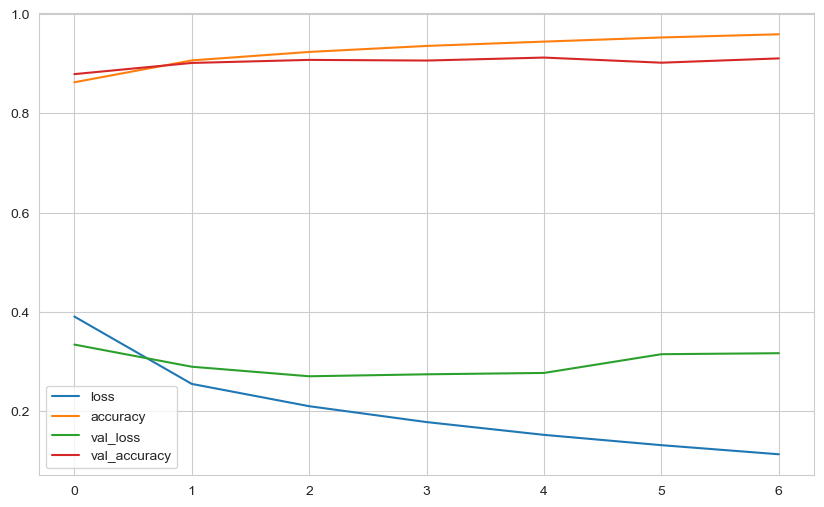

In [54]:
summary.plot(); # After some experiments, this is the best result I got

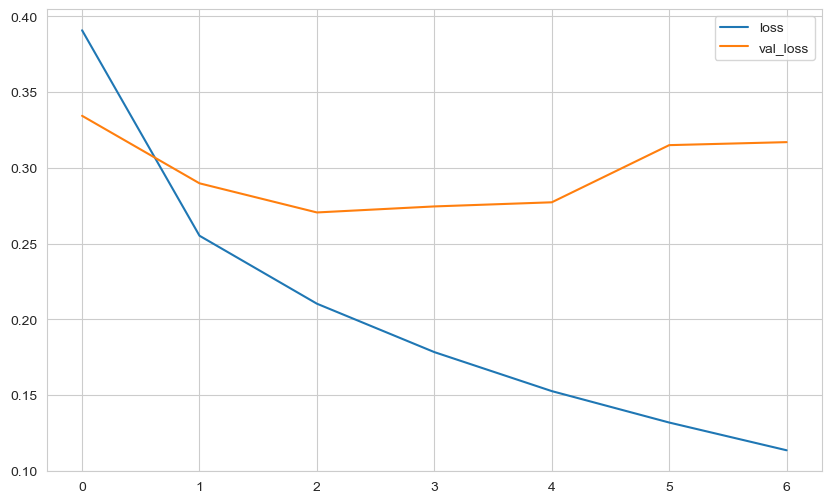

In [55]:
summary[["loss", "val_loss"]].plot() # After epoch #2 no decreasing in val_loss that's why early stopping occurs
plt.show()

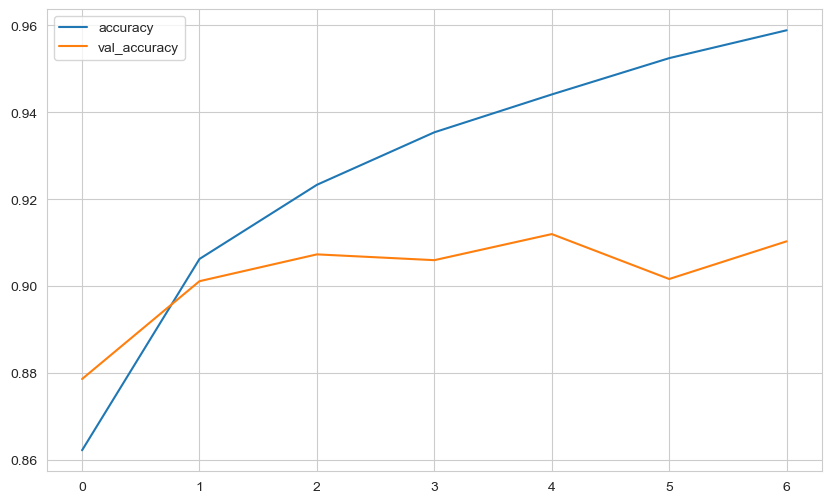

In [56]:
summary[["accuracy", "val_accuracy"]].plot() 
plt.show() # Maybe we will observe increasing in val_accuracy after more epochs as it starts to increase at the last epoch.

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [58]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.27248942852020264
Test accuracy: 0.9039000272750854


In [59]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 9s 27ms/step


array([[1.3442037e-06, 1.3791266e-07, 1.5372174e-05, ..., 3.2552606e-03,
        1.9203208e-06, 9.9670178e-01],
       [3.6795052e-05, 2.0428440e-13, 9.9994445e-01, ..., 3.8060540e-12,
        2.3994322e-12, 2.7431017e-13],
       [1.2389899e-07, 9.9999881e-01, 1.9957227e-08, ..., 5.1520992e-09,
        7.3816847e-10, 1.4180804e-09],
       ...,
       [9.7609097e-07, 1.1624982e-09, 3.7786565e-06, ..., 8.9809697e-07,
        9.9926227e-01, 6.5278960e-09],
       [6.3902417e-07, 9.9995732e-01, 2.9565783e-07, ..., 7.1832730e-08,
        2.9313660e-09, 1.6054285e-06],
       [1.2129704e-03, 4.4902659e-04, 1.9095136e-02, ..., 1.5409702e-01,
        1.5607127e-03, 5.6526535e-03]], dtype=float32)

In [60]:
pred_prob.shape

(10000, 10)

In [61]:
pred_prob[0]

array([1.3442037e-06, 1.3791266e-07, 1.5372174e-05, 3.7317116e-07,
       1.7816740e-06, 1.9391260e-05, 2.6900348e-06, 3.2552606e-03,
       1.9203208e-06, 9.9670178e-01], dtype=float32)

In [62]:
y_pred = np.argmax(pred_prob, axis=1) # To get the index of the higest probapility
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [63]:
y_pred.shape

(10000,)

In [64]:
y_test.shape

(10000,)

In [65]:
y_pred[0]

9

In [66]:
y_test[0]

9

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.82      0.86      0.84      1000
           3       0.86      0.94      0.90      1000
           4       0.82      0.87      0.84      1000
           5       0.99      0.96      0.97      1000
           6       0.79      0.69      0.74      1000
           7       0.94      0.97      0.96      1000
           8       0.99      0.95      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [68]:
print(confusion_matrix(y_test, y_pred))

[[852   0  19  34   5   1  87   0   2   0]
 [  1 970   1  24   3   0   1   0   0   0]
 [ 12   0 863  10  71   0  44   0   0   0]
 [  7   0   8 940  29   0  16   0   0   0]
 [  1   1  69  35 868   0  26   0   0   0]
 [  1   0   0   0   0 956   0  26   0  17]
 [100   0  85  39  80   0 693   0   3   0]
 [  0   0   0   0   0   3   0 971   0  26]
 [  7   0   6   9   7   1   9   6 955   0]
 [  1   0   0   0   0   2   0  26   0 971]]


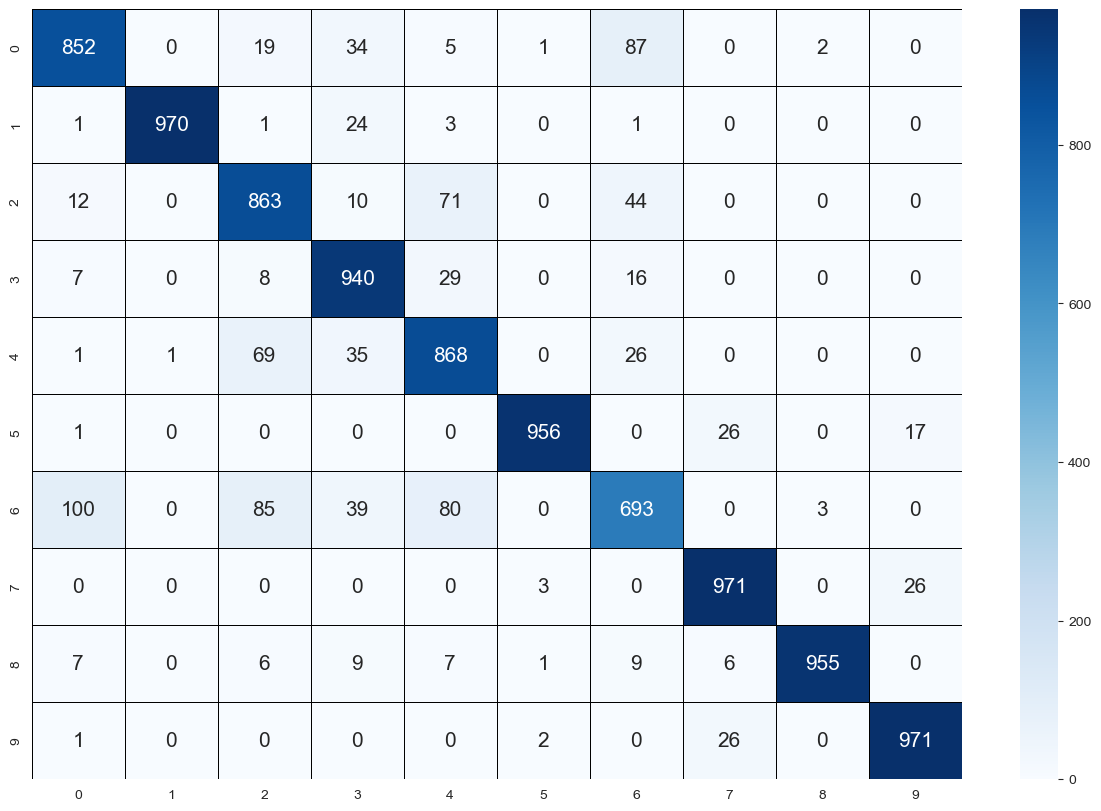

In [69]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()
# We can observe most of misclassifications occurs between 0 and 6 ( T-shirts and Shirts ) 
# To get better results increasing the number of these images may be a good practice

In [70]:
np.not_equal(y_test, y_pred).sum()

961

In [71]:
np.equal(y_test, y_pred).sum()

9039

## Prediction

In [72]:
one_sample = X_test[6]

In [73]:
one_sample.shape

(28, 28, 1)

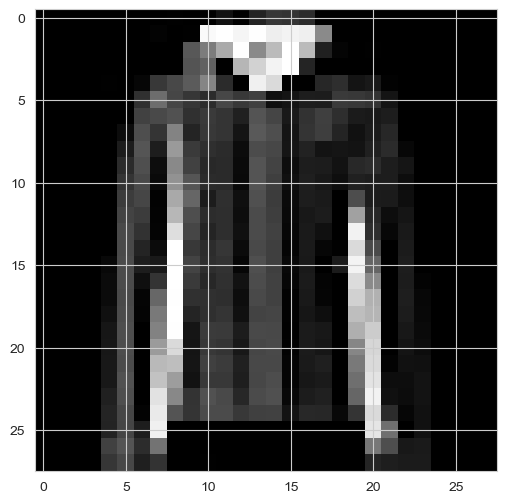

In [74]:
plt.imshow(one_sample, cmap="gray")
plt.show()

In [75]:
np.expand_dims(one_sample, 0).shape

(1, 28, 28, 1)

In [76]:
pred_prob = model.predict(np.expand_dims(one_sample, 0))
pred_prob

1/1 [==============================] - 0s 309ms/step


array([[2.2403399e-06, 1.5173109e-07, 5.9196096e-02, 1.4315917e-06,
        9.4011706e-01, 2.3654534e-10, 6.8302505e-04, 6.1598762e-13,
        8.3684240e-11, 2.8084224e-11]], dtype=float32)

In [77]:
y_pred = np.argmax(pred_prob)
y_pred

4

In [78]:
classes[y_pred]

'Coat'

In [79]:
## Another wat for prediction

#model.save("Assignment2model.h5")

In [80]:
#model = tf.keras.models.load_model("Assignment2model.h5")

In [81]:
#pred_prob = model.predict(np.expand_dims(X_test[6], 0))

In [ ]:
#y_pred = np.argmax(pred_prob)

In [ ]:
#classes[y_pred]

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___